In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

# Data

In [4]:
weight = 0.5
bias = 0.3


start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

## Split data


In [5]:
train_split = int(.8*len(X))
x_train, y_train = X[:train_split],y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

In [6]:
# Visualize function
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=None):
    """
    Plots training data, test data amd compares predictions.
    """

    plt.figure(figsize=(10,7))

    # Data in blue
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Test in red

    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

    # Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions)
        
    plt.legend(prop={"size":14})

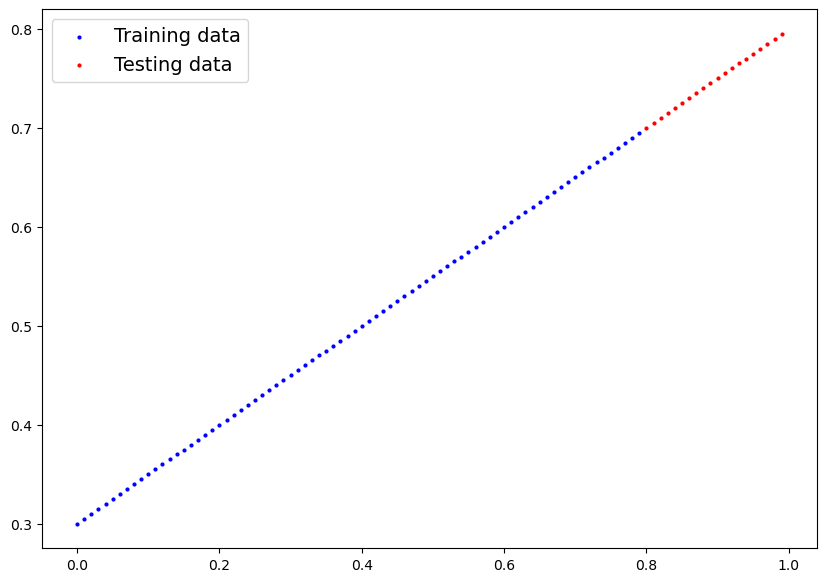

In [7]:
plot_predictions()

# Model


In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1,out_features=1)
        
        # Define computattion in model
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)
    

In [9]:
model = LinearRegressionModel()

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

model.state_dict()

OrderedDict([('linear.weight', tensor([[0.4035]])),
             ('linear.bias', tensor([-0.5606]))])

In [10]:
model.to(device)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
# Put data on cuda

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [12]:
# 1 loop throught the data
epochs = 10000
epoch_count  = []
loss_value = []
test_lost_values = []

# 0 Loop through the data
for epoch in range(epochs):
    # Set model to training mode
    model.train()
    
    # 1. Forward pass
    y_pred = model(x_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the modelse
    loss.backward()
    
    # 5. Step the optimizer (performe gradient descent)
    optimizer.step()
    
    # Testing
    model.eval()
    
    with torch.inference_mode():
        test_pred = model(x_test)
        
        test_lost = loss_fn(test_pred, y_test)
        
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_lost_values.append(test_lost)
    
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_lost}")

Epoch: 0 | Loss: 0.8986634612083435 | Test Loss: 0.9455386996269226
Epoch: 1000 | Loss: 0.03326085954904556 | Test Loss: 0.07680139690637589
Epoch: 2000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 3000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 4000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 5000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 6000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 7000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 8000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505
Epoch: 9000 | Loss: 0.0006111953407526016 | Test Loss: 0.0003691255988087505


In [13]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.5007]], device='cuda:0')),
             ('linear.bias', tensor([0.3003], device='cuda:0'))])

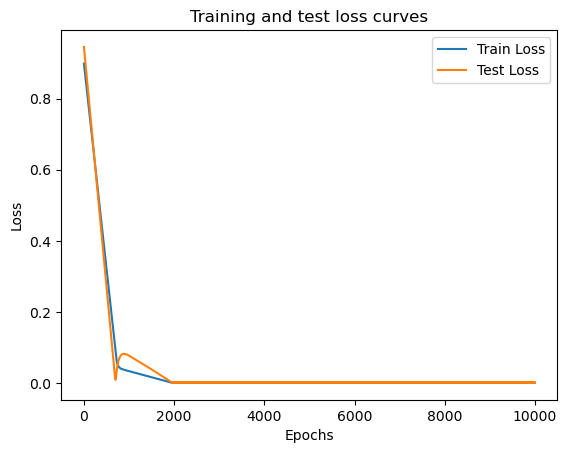

In [14]:
plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()),label="Train Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_lost_values).numpy()),label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

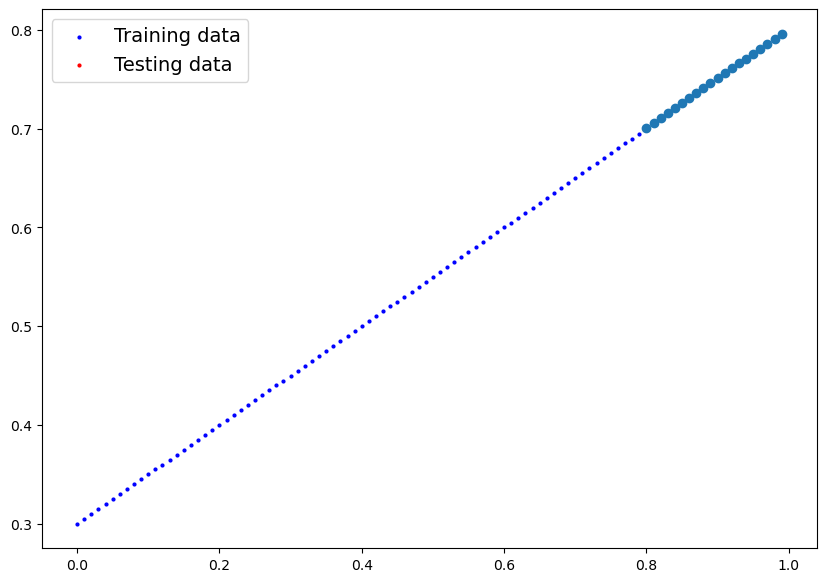

In [15]:
with torch.inference_mode():
    y_preds = model(x_test)
    
plot_predictions(predictions=y_preds.cpu())

In [16]:
# Saving model in pytorch 
from pathlib import Path

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path

MODEL_NAME = "LinearRegressionModle.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: Models\LinearRegressionModle.pth


In [17]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>